In [1]:
import pandas as pd

In [2]:
cdf = pd.read_csv('mach_learn_df.csv')

cdf = cdf.drop(columns=['Unnamed: 0','City'])

In [3]:
cdf.I

,Hour,Offense_Type,Premise,Tract,Month,Day_of_Week,Temperature,Weather
0,0,Burglary/Robbery,Residence or House,313100,1,Monday,46.56,Clouds
1,0,Burglary/Robbery,Apartment,321300,1,Monday,46.56,Clouds
2,0,Burglary/Robbery,"Road, Street, or Sidewalk",432801,1,Monday,46.56,Clouds
3,0,Assault,"Road, Street, or Sidewalk",330700,1,Monday,46.56,Clouds
4,0,Theft,"Church, Synagogue, or Temple Parking Lot",312800,1,Monday,46.56,Clouds
...,...,...,...,...,...,...,...,...
309954,23,Theft,"Residence, Home (Includes Apartment)",521700,5,Sunday,74.26,Rain
309955,23,Intimidation,"Residence, Home (Includes Apartment)",521200,5,Sunday,74.26,Rain
309956,23,Theft,"Bank, Savings & Loan",521200,5,Sunday,74.26,Rain
309957,23,Intimidation,"Residence, Home (Includes Apartment)",431102,5,Sunday,74.26,Rain


In [60]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

X = cdf.values 

labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,1] = labelencoder_X.fit_transform(X[:,1])
onehotencoder = OneHotEncoder(categorical_features=[0,1])
X = onehotencoder.fit_transform(X).toarray()
print(X)

/Users/ryanashcraft/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/ryanashcraft/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


[[ 1.    0.    0.   ...  0.   46.56  0.  ]
 [ 1.    0.    0.   ...  0.   46.56  0.  ]
 [ 1.    0.    0.   ...  0.   46.56  0.  ]
 ...
 [ 0.    0.    0.   ...  6.   74.26  3.  ]
 [ 0.    0.    0.   ...  6.   74.26  3.  ]
 [ 0.    0.    0.   ...  6.   74.26  3.  ]]


In [48]:
for column in ['Offense_Type','Premise', 'Tract','Day_of_Week','Weather']:
    x = pd.api.types.CategoricalDtype(categories=list(cdf[column].unique()), ordered=False)
    cdf[column] = cdf[column].astype(x).cat.codes
# off_cat = pd.api.types.CategoricalDtype(categories=list(cdf.Offense_Type.unique()), ordered=False)
# cdf.Offense_Type.astype(off_cat)


In [53]:
cdf
# cat_list

,Hour,Offense_Type,Premise,Tract,Month,Day_of_Week,Temperature,Weather
0,0,0,0,0,1,0,46.56,0
1,0,0,1,1,1,0,46.56,0
2,0,0,2,2,1,0,46.56,0
3,0,1,2,3,1,0,46.56,0
4,0,2,3,4,1,0,46.56,0
...,...,...,...,...,...,...,...,...
309954,23,2,127,15,5,6,74.26,3
309955,23,6,127,436,5,6,74.26,3
309956,23,2,143,436,5,6,74.26,3
309957,23,6,127,98,5,6,74.26,3


In [67]:
from sklearn.cluster import KMeans

import numpy as np

# X = pd.DataFrame(data=[cdf.Hour, cdf.Offense_Type, cdf.Premise, cdf.Tract, cdf.Month, cdf.Day_of_Week, cdf.Temperature, cdf.Weather]).to_numpy()
X = cdf.values
kmeans = KMeans(n_clusters=7, random_state=42, n_jobs=-1).fit(X)
kmeans.labels_

array([5, 5, 5, ..., 6, 0, 1], dtype=int32)

In [68]:
print(len(kmeans.labels_))

309959


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6c80b7710>,
      dtype=object)

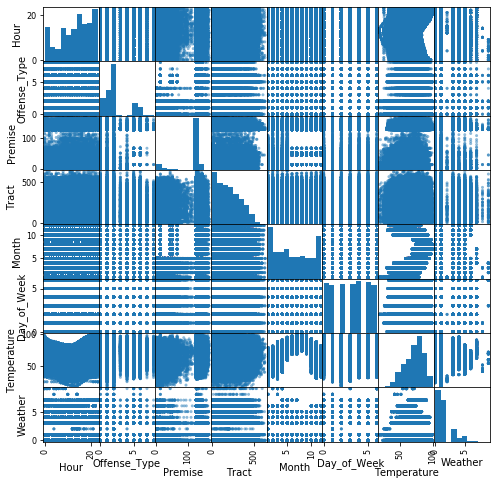

In [25]:
import plotly.express as px
# df = pd.DataFrame(data=[cdf.Premise.cat.codes, cdf.Offense_Type.cat.codes, cdf.Offense_Count, cdf.Tract.cat.codes,cdf.Hour])
pd.plotting.scatter_matrix(cdf, figsize=(8,8))

In [69]:
# Predict the clusters
predicted_clusters = kmeans.predict(X[300000:300005])

predicted_clusters

array([4, 4, 0, 2, 6], dtype=int32)

In [40]:
# from sklearn.metrics import confusion_matrix, accuracy_score

# print('Accuracy score:', accuracy_score(y, labels))
# print(confusion_matrix(y, labels))

# predicted_clusters

NameError: name 'y' is not defined

In [64]:
predictions_test = LabelEncoder().inverse_transform(X)

predictions_test

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [46]:
result = zip(X , kmeans.labels_)

sorted_results = sorted(result, key=lambda x: x[1])
sorted_results

[(array([ 11.  ,   2.  ,  49.  , 178.  ,   1.  ,   1.  ,  30.09,   0.  ]), 0),
 (array([ 14.  ,   2.  ,  54.  , 160.  ,   1.  ,   1.  ,  29.57,   2.  ]), 0),
 (array([ 14.  ,   2.  ,  57.  , 177.  ,   1.  ,   2.  ,  25.83,   1.  ]), 0),
 (array([  0.  ,   0.  ,  60.  , 145.  ,   1.  ,   3.  ,  43.02,   1.  ]), 0),
 (array([  0.  ,   0.  ,  57.  , 162.  ,   1.  ,   4.  ,  47.43,   1.  ]), 0),
 (array([  8.  ,   2.  ,  50.  , 170.  ,   1.  ,   4.  ,  43.61,   1.  ]), 0),
 (array([ 11.  ,   2.  ,  61.  , 142.  ,   1.  ,   4.  ,  42.93,   1.  ]), 0),
 (array([ 15.  ,   2.  ,  46.  , 175.  ,   1.  ,   4.  ,  46.36,   0.  ]), 0),
 (array([ 22. ,   2. ,  59. , 162. ,   1. ,   4. ,  54.9,   0. ]), 0),
 (array([ 10.  ,   2.  ,  76.  , 128.  ,   1.  ,   5.  ,  40.08,   1.  ]), 0),
 (array([ 11.  ,   2.  ,  61.  , 157.  ,   1.  ,   5.  ,  39.52,   1.  ]), 0),
 (array([ 16.  ,   2.  ,  77.  , 125.  ,   1.  ,   5.  ,  52.18,   1.  ]), 0),
 (array([ 19.  ,   1.  ,  60.  , 172.  ,   1.  ,   6.  ,  67